# Coding a quantum time-machine: testing the power of closed-timelike-curves using quantum circuits in Qiskit

Welcome to the code tutorial for the “quantum time-loops” installment of the Paradoxes series on the Qiskit YouTube channel. In this tutorial, we’ll explain how to simulate closed-timelike-curves with quantum circuits. Along the way, we will see how we can resolve classic time-travel paradoxes such as the Grandfather Paradox, and how time-loops could give us vast computational power — allowing us to violate the no-cloning theorem and store large amounts of classical information in a single qubit. By using Qiskit to simulate having access to time-loops using Qiskit, we will see how time-loops let us get around the usual constraints of quantum mechanics, and even break quantum cryptographic protocols.

If you haven't already, I recommend you first watch [our video](https://youtu.be/jcC1Ck45Ykw) on the Qiskit YouTube channel, which explains the context of the thought experiment and provides a useful overview of the Qiskit code we’ll use to simulate it in this tutorial. I also suggest reading the blog post (link coming soon) for a deeper look at the background of the thought experiment.

Now, let's start by considering a classic time-travel paradox and seeing how to resolve this in quantum mechanics. 

### The Grandfather Paradox 

The Grandfather Paradox is a typical time-travel paradox: A time traveler travels to the past and kills their own grandfather, doing so before the grandfather has had the child that will become the time traveler's parent. If the grandfather never creates the human being that will be the time traveler's parent, it means the time traveler was never born in the first place, and therefore never went back in time to kill their grandfather... a paradox!  

A solution to the grandfather paradox in quantum mechanics was proposed by David Deutsch in 1991, using a consistency condition. This condition imposes that a system coming out of a time-machine must be identical to the one that went in. It holds whether the system in the time-loop is a qubit, or any other kind of quantum system. 

### Strange consequences 

However, the consistency condition leads to a lot of powerful phenomena beyond standard quantum mechanics. For example, with access to a quantum time-loop, you can: 
1) Violate Heisenberg's uncertainty principle by simultaneously measuring a quantum state in the X basis and the Z basis
2) Violate the no-cloning theorem, you can clone as many quantum states as you like
3) Store unbounded amounts of classical information, like the complete works of Shakespeare or your entire music collection, in a single qubit
4) Break the security of quantum cryptographic protocols like BB84 

Let's simulate a time-loop with a quantum circuit to see how we can simulate some of these extra computational powers using Qiskit. 

**A time-loop as a quantum circuit**

In the [Qiskit video](https://youtu.be/jcC1Ck45Ykw), I enter a "time-machine", and appear in the past. Then I have a conversation with my past self. My past self then goes into the time-machine, and I carry on with the video. Let's model this situation using quantum circuits. 

I'm going to be using reduced density matrices to describe the states of quantum systems. If you are not familiar with the formalism of density matrices, I recommend reading [the section on density matrices on the Qiskit Learning Platform](https://learn.qiskit.org/course/quantum-hardware/density-matrix). 

Now I'm going to model myself going into and out of the time-machine as a quantum system. If you want to find out more about the validity of treating macroscopic observers as quantum systems, take a look at my videos on [Schrödinger's cat](https://youtu.be/sBtAe8BsOhA?si=udkFiIvEFTlz7Gvz) and [Wigner's friend](https://youtu.be/TMBK88Mpg5U?si=DMmnqFeNjDZ206Wk). Here I'm going to assume that quantum theory is universal, and we can describe any system as a quantum state. 

Here is the overall circuit:

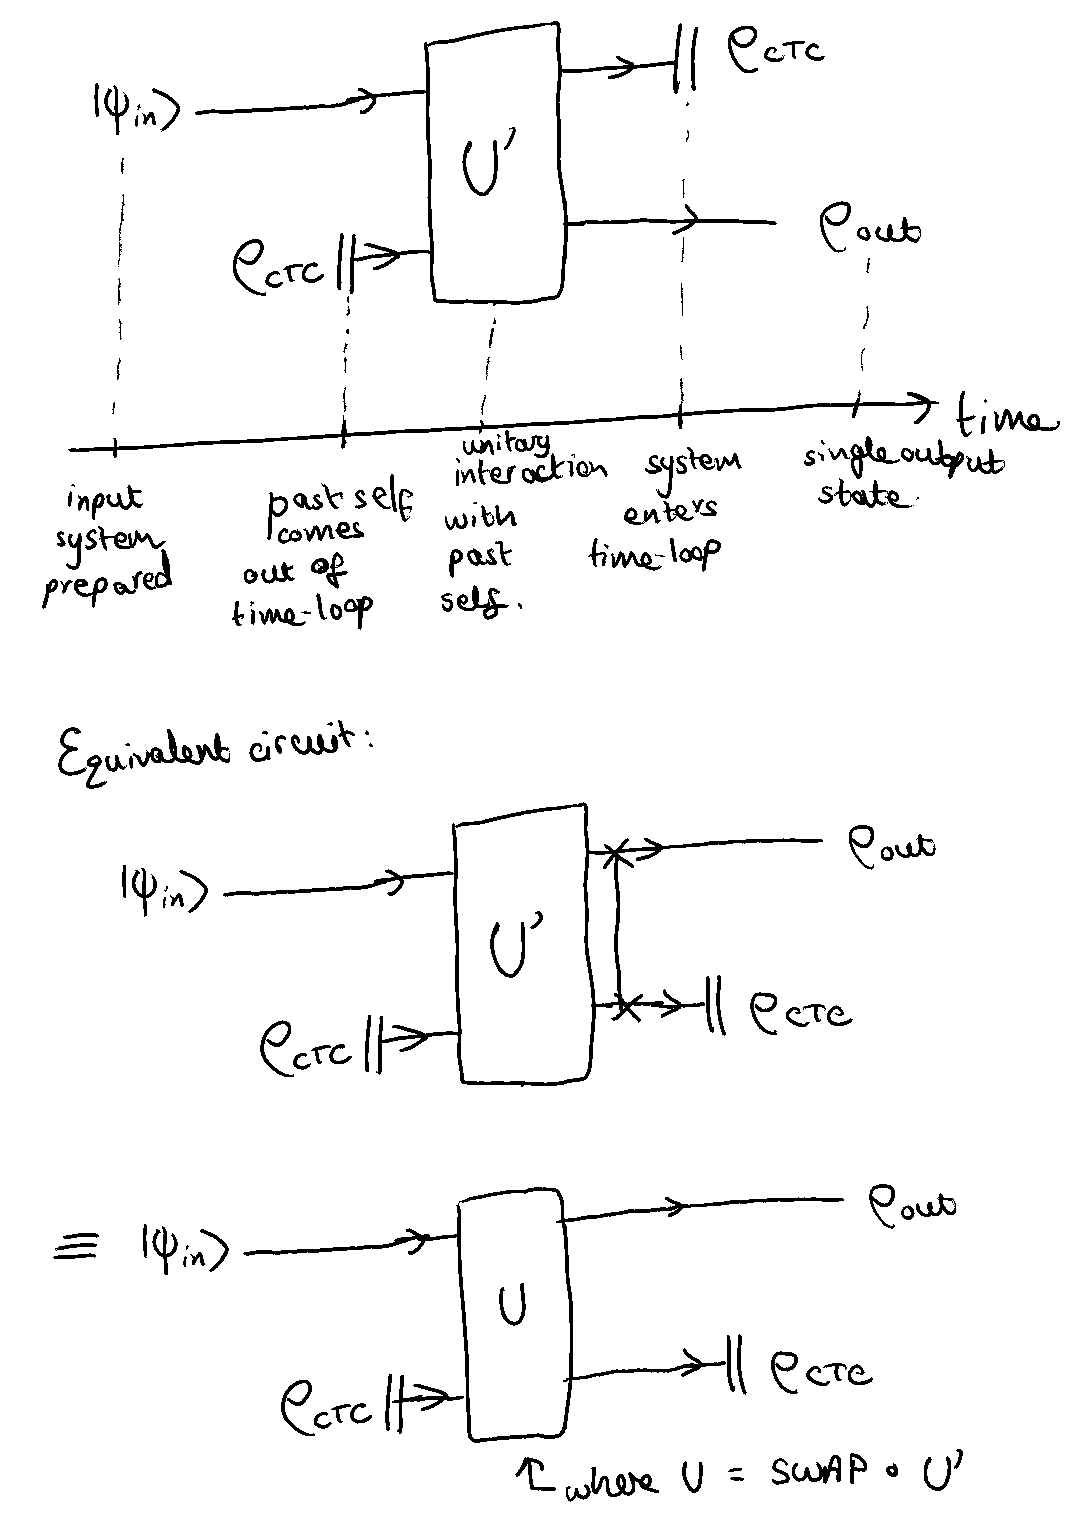

Let's say that my original self that started the video was in the state $\psi_{in}$, represented by the statevector $|{\psi_{in}}\rangle$. 

Then my future self comes out of the time-machine. I will describe the state of my future self by the density matrix $\rho_{CTC}$, where CTC stands for closed-timelike-curve, which is the technical term for time-loops in physics. 

Next, my two selves interact. Since they are quantum systems, they must interact via a unitary interaction, which I have labelled U'. 

After that, my original self enters the time-machine. To avoid paradoxes, I must enter the time-machine in the same state that I leave the time-machine, so my state as I enter the time-machine must also be $\rho_{CTC}$. 

My other self stays and continues with the video, and I have labelled her final state as $\rho_{out}$.

It is helpful to rewrite this circuit in an equivalent form. Let's add a SWAP gate between my two selves before the end of the circuit. This is a valid unitary gate, which swaps the states of two systems. 

Then I can write my circuit using a unitary U, which is the same as U' but with a SWAP gate at the end. Now the first quantum system begins in psi_in and comes out in $\rho_{out}$ after the unitary U, and the second quantum system comes out of the time machine in the state $\rho_{CTC}$, then goes back in to the time-machine in the state $\rho_{CTC}$, after the unitary U. 

So in our rewritten circuit, the consistency condition for avoiding "grandfather paradoxes" is that the qubit that goes into the time-loop must be in the same state as the qubit that comes out of the time-loop. 

Mathematically, the reduced state of the system that goes in to the time-loop, $\rho_{CTC}$, must be equal to the state we get when we let the input state $\psi_{in}$ and the input state $\rho_{CTC}$ interact via the unitary U, and then trace out the first system, so the reduced state of the second system remains as $\rho_{CTC}$:

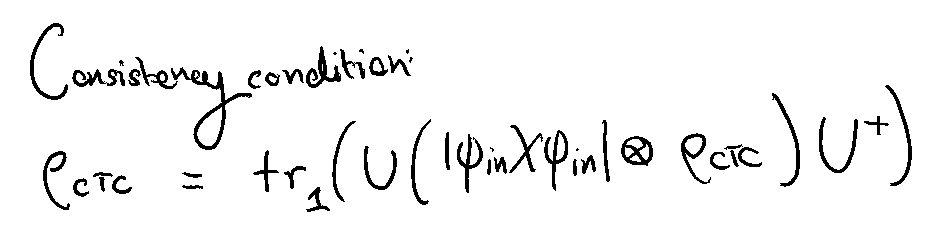

Now, famously, standard quantum mechanics is linear. The consistency condition introduces non-linearity, because the consistent state imposed on the qubit in the time-loop depends on the state of the qubit it interacts with. This non-linearity makes lots of strange things happen that can't occur in standard quantum mechanics without time-loops, which we will now demonstrate using Qiskit!

## Coding with Closed-Timelike-Curves

Unfortunately, we don't currently have access to time-loops - or even know if they can really exist. My interaction with my past self in the video was artificially made by filming two separate clips and editing them on top of each other, and was pre-prepared to make the interaction self-consistent according to the consistency condition. 

Similarly, when coding this as a quantum circuit, we have artificially simulate the non-linearity of having access to a time-loop. 

**Distinguishing |0$\rangle$ and |-$\rangle$ with one measurement:**

For our first trick with CTCs, I'll show you how they let us distinguish the quantum states |0$\rangle$ and |-$\rangle$ with a single measurement. This protocol was demonstrated in the paper "Localised closed timelike curves can perfectly distinguish quantum states" by Todd A. Brun, Jim Harrington, and Mark M. Wilde, which you can read [here](https://arxiv.org/abs/0811.1209).

Here's the quantum circuit given in Fig. 1 of the paper:

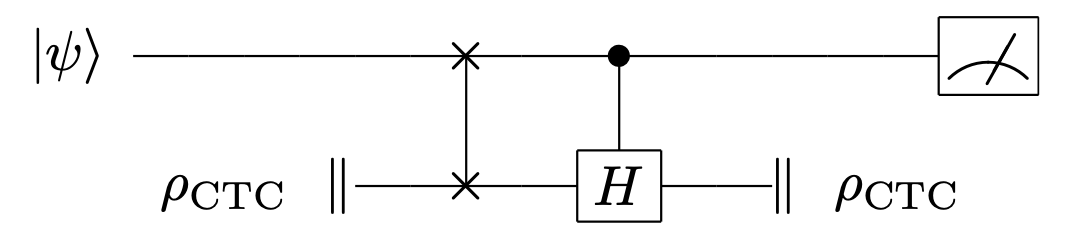

Let's code this in Qiskit. In the code, I'll first ask for user input of "0" to prepare the |0$\rangle$ state and "-" to prepare the |-$\rangle$ state. If the user inputs "0", then my code leaves the system qubit as |0$\rangle$ and the time-loop qubit as |0$\rangle$, which is the state needed to make the time-loop qubit's input and output states the same according to the consistency condition. 

If the user inputs "-", then my code applies an H and Z gate to the system qubit to prepare it in the |-$\rangle$ state, and an X gate to the CTC qubit to prepare it in the |1$\rangle$ state, which is the state needed to satisfy the consistency condition when the input is |-$\rangle$. 

I have artifically introduced the non-linearity into the quantum circuits by making the preparation of $\rho_{CTC}$ depend on the input state $\psi$, which in a real time-loop would automatically be self-consistent. 

Let's run this for an input of "0" and an input of "-":

Enter '0' to prepare |0> or '-' to prepare |->0


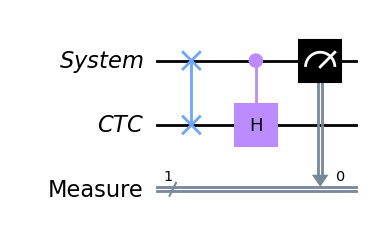

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

user_input = input("Enter '0' to prepare |0> or '-' to prepare |->")

sys = QuantumRegister(1, "System")
ctc = QuantumRegister(1, "CTC")
cr = ClassicalRegister(1, "Measure")

qc = QuantumCircuit(sys, ctc, cr)

if user_input == "-":
    qc.h(sys)
    qc.z(sys)
    qc.barrier()
    qc.x(ctc)
    qc.barrier()

qc.swap(sys, ctc)
qc.ch(sys, ctc)
qc.measure(sys, cr)

qc.draw('mpl')

In [5]:
from qiskit_aer import AerSimulator 
from qiskit import transpile

backend = AerSimulator()
transpiled_circuit = transpile(qc, backend)
result = backend.run(transpiled_circuit).result()
counts = result.get_counts(transpiled_circuit)

print("Measurement results:")
print(counts)

Measurement results:
{'0': 1024}


Try the different inputs for yourself! You will see that when the input state is "0", the output is always 0, and when the input state is "-", the output is always 1. So time-loops allow us to perfectly distinguish the "0" state from the "-" state with a single measurement!

**Distinguishing states for BB84 protocol, |0$\rangle$, |1$\rangle$, |+$\rangle$ and |-$\rangle$, in one shot**

Using the same idea, we can create a quantum circuit that can distinguish between the four states |0$\rangle$, |1$\rangle$, |+$\rangle$ and |-$\rangle$ in a single shot. This means that someone with access to a time-loop could cheat the BB84 protocol, which is meant to provide a fool-proof way of protecting information from eavesdroppers using quantum cryptography. The protocol relies on the ability to check if someone intercepted a message, but with a time-loop, the eavedropper could intercept the message, measure its state, and then prepare an exact copy of the state, covering their tracks. 

Here's the circuit for distinguishing the four BB84 states, from Fig. 2 of the paper: 

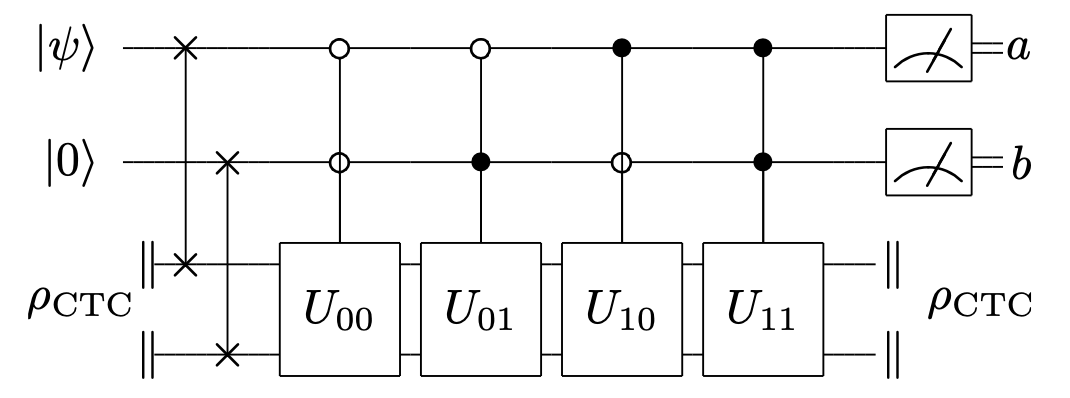

with the definitions of the unitary gates given in equation (3) of the paper:

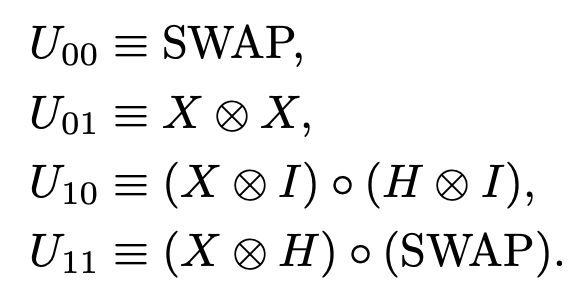

Here's how to code this circuit in Qiskit: 

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import CSwapGate
#Define custom gates 
ccswap = CSwapGate(ctrl_state=0).control(1, ctrl_state=0)
#custom ccXX gate
qc_X2 = QuantumCircuit(2)
qc_X2.x(0)
qc_X2.x(1)
X2 = qc_X2.to_gate()
X2.name = "X2"
ccxx = X2.control(2, ctrl_state='10')
#custom ccXH gate 
qc_xh = QuantumCircuit(1)
qc_xh.h(0)
qc_xh.x(0)
XH = qc_xh.to_gate()
XH.name = "XH"
ccxh = XH.control(2, ctrl_state='01')
#custom cc,SWAP, X1 H2 gate 
qc_4 = QuantumCircuit(2)
qc_4.swap(0,1)
qc_4.x(0)
qc_4.h(1)
X1_H2_SWAP = qc_4.to_gate()
X1_H2_SWAP.name = "X1_H2_SWAP"
xhs = X1_H2_SWAP.control(2, ctrl_state='11')

Enter '0', '1', '+', or '-' to prepare corresponding state on first qubit: 0


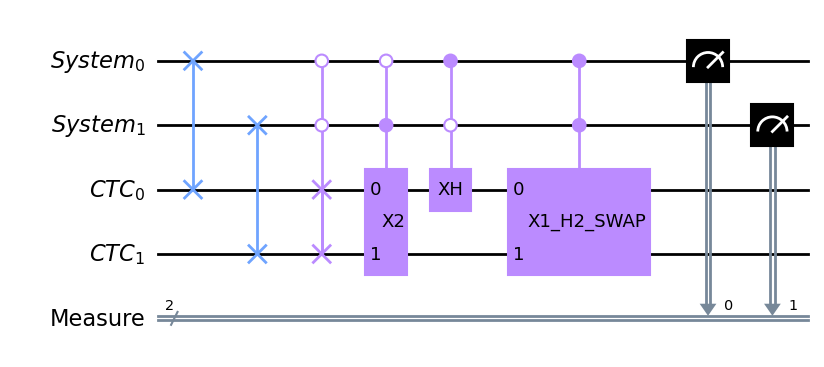

In [7]:
user_input = input("Enter '0', '1', '+', or '-' to prepare corresponding state on first qubit: ")
sys, ctc, cr = QuantumRegister(2, "System"), QuantumRegister(2, "CTC"), ClassicalRegister(2, "Measure")
qc = QuantumCircuit(sys, ctc, cr)

if user_input == "1":
    qc.x(sys[0]); qc.x(ctc[1])
elif user_input == "+":
    qc.h(sys[0]); qc.x(ctc[0])
elif user_input == "-":
    qc.x(sys[0]); qc.h(sys[0]); qc.x(ctc)
elif user_input != "0":
    print("Invalid input. Please enter '0', '1', '+', or '-'.")
    
qc.swap(sys[0], ctc[0]); qc.swap(sys[1], ctc[1])
qc.append(ccswap, [sys[0], sys[1], ctc[0], ctc[1]])
qc.append(ccxx, [sys[0], sys[1], ctc[0], ctc[1]])
qc.append(ccxh, [sys[0], sys[1], ctc[0]])
qc.append(xhs, [sys[0], sys[1], ctc[0], ctc[1]])
qc.measure(sys[0], cr[0]); qc.measure(sys[1], cr[1])

qc.draw("mpl")

In [8]:
transpiled_circuit = transpile(qc, backend)
result = backend.run(transpiled_circuit).result()
counts = result.get_counts(transpiled_circuit)

print("Measurement results:")
print(counts)

Measurement results:
{'00': 1024}


If you try running this with different inputs, you will see that when we input "0", the output is 00; when we input "1", the output is 10; when we input "+", the output is 01; and when we input "-", the output is 11. So, we can distinguish any of the four possible input states with a single measurement. 

**The strange powers given by CTCs**

From an information-theory perspective, we would achieve something extremely surprising if we could really implement this circuit. We would gain two bits of classical information by measuring a single input qubit, even though a qubit can normally only store 1 bit of information. 

Even worse, we could construct a similar circuit to distinguish between any number of non-orthogonal states! This means we could store an unbounded amount of classical information in a single qubit! You could try making this circuit yourself, or even making one that violates the no-cloning theorem. 

Access to time-loops make us much more powerful than if we just had access to a universal quantum computer. Exactly how powerful was worked out by quantum scientists Scott Aaronson and John Watrous in 2008 (see [this paper](https://arxiv.org/abs/0808.2669) for details). 

The power of computers is defined by complexity classes. Aaronson and Watrous showed that the complexity class for a computer with access to time-loops is PSPACE: all problems solvable by a conventional computer using a polynomial amount of memory! (However, it is worth nothing that these problems may still require exponential time.) PSPACE is a huge space, much bigger than the complexity class of quantum computers without time-loops. Strangely, given access to time-loops, the complexity classes of classical and quantum computers become the same.

## Paradoxes remain...

While the remarkable computational power of time-loops makes their existence surprising and counter-intuitive, it does not rule them out. However, some problems remain in making time-loops fully consistent with the laws of physics. 

One is the "Knowledge paradox."

In the video, I explain how time-loops work to my past self. Armed with this knowledge, my past self goes through the time-machine and explains time-loops to another past version of me. There is no logical inconsistency here, but where did my knowledge about time-loops come from? 

If I was taught about time-loops from my past self, then there is no mechanism by which that knowledge could have been created.

Another problem is with locality. 

Einstein proposed a criterion for locality of quantum theory, which says that one system can only be affected by another system if they directly interact. Even though some accounts of entanglement make it appear that measuring one quantum system instantaneously affects the other, there is a local formulation of quantum theory, explained in my previous videos on the [EPR paradox](https://youtu.be/eoPX4WJlOM8?si=xWcyxEP-T2tp4KQ7) and [quantum teleportation](https://youtu.be/KsvNsY4cVvE?si=DxN5-7wpiW6l5kDW). Einstein's locality is important for making quantum theory consistent with a theory of gravity. 

With time-loops, Einstein's principle of locality is violated! Observables of a qubit going into a time-loop could in principle be different from those coming out of the closed-timelike-curve, even though the density matrix is the same, violating Einstein's locality. Some attempts have been made to restore locality by modifying quantum theory, but the challenge remains of ensuring that there are no time-travel paradoxes emerging in these alternative formulations.

The unsolved problems with time-loops might be hints that they are fundamentally incompatible with our universe. Then again: the idea of efficiently factorizing large numbers seemed impossible before the discovery of quantum computing and [Shor's algorithm](https://youtu.be/6qD9XElTpCE?si=kDNljxY5yq5FnlFs). So, perhaps one day, the discovery that time-loops are possible will bring another revolution in computing. 

That's all on Quantum Paradoxes for now - hope you enjoyed this series of videos, blogs and code tutorials, and have fun coding your own thought experiments with Qiskit!